In [1]:
# download on https://drive.google.com/file/d/1vbMP-6_tGzOyaOiTa6s16rnhbGjU1BUi/view
# link found on https://github.com/deepinsight/insightface/issues/1219

In [2]:
import pandas as pd

from pathlib import Path

In [3]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if file.suffix != '.jpg':
            print(f'File with extension different than .jpg. File extension found: {file.suffix}')
        else:
            filename = file.stem
            attributes = filename.split('_')
            data = {
                'person_id': attributes[0],
                'person_name': attributes[1],
                'age': int(attributes[2]),
                'sex': attributes[3],
                'filepath': str(file.relative_to(current_path))
            }
            dataset.append(data)
    return dataset

In [4]:
dataset_data = read_dataset('../datasets/agedb/AgeDB')

In [5]:
df = pd.DataFrame(dataset_data)

df.head()

,person_id,person_name,age,sex,filepath
0,6924,BorisKarloff,54,m,../datasets/agedb/AgeDB/6924_BorisKarloff_54_m...
1,785,akistsoxatzopoulos,30,m,../datasets/agedb/AgeDB/785_akistsoxatzopoulos...
2,5416,JonFinch,54,m,../datasets/agedb/AgeDB/5416_JonFinch_54_m.jpg
3,8643,JamesStewart,32,m,../datasets/agedb/AgeDB/8643_JamesStewart_32_m...
4,7597,SylvesterStallone,45,m,../datasets/agedb/AgeDB/7597_SylvesterStallone...


<AxesSubplot:>

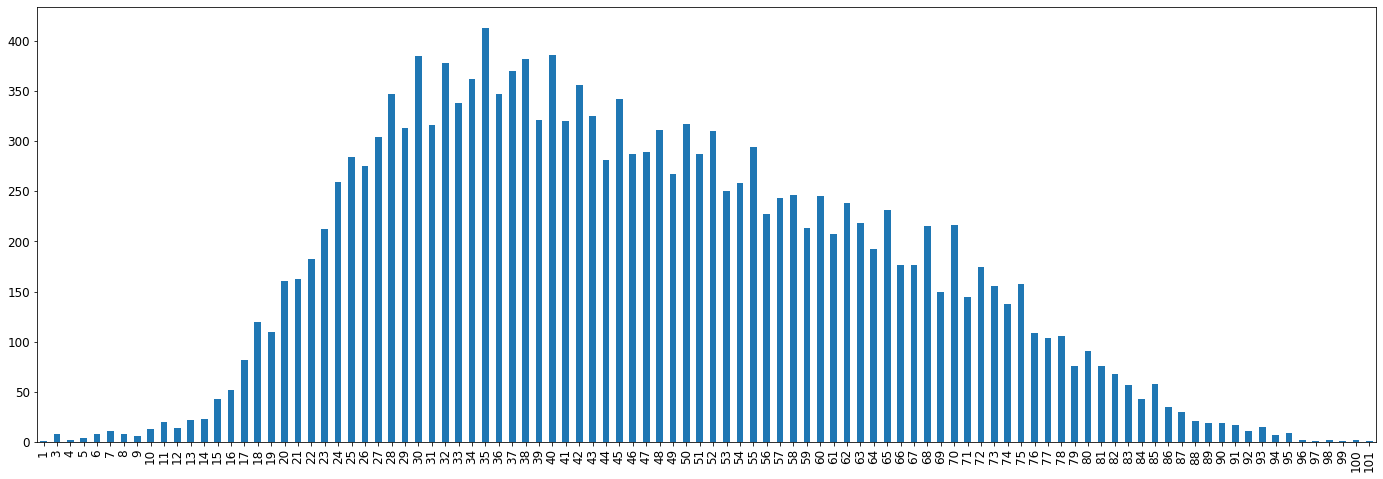

In [6]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [7]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [8]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  1.92%
